# **ESERCIZIO 9**

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$


You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...


### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should __preserve the bonds of the problem__ : the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** </span> that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 
Ad esempio se parto dalla distribuzione uniforme con r, se metto p=2 mi genera con maggiore probabilità numeri vicini allo 0, perche starei elevando al quadrato numeri con modulo<1

 __Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2__, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):</span>
__IMPORTANTE__

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
quindi di fatto vado a vedere l'ordine di come appaiono i numeri. perche se sostituissi pezzi di vettore e facessi copia incolla, ovviamente andrei a violare per esempio il vincolo di non passare due volte dalla stessa città.
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!


Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
questo per controllare che il nostro codice funzioni: infatti sappiamo gia che se le citta sono disposte in circonferenza, il percorso migliore sarà lungo 2pigreco*r
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of</span> $L^{(2)}$ (or</span> $L^{(1)}$) of the best path and of</span> $\langle L^{(2)}\rangle$ (or</span> $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>

- a picture of the best path in cartesian coordinates

## Soluzione:
Per affrontare il problema del commesso viaggiatore ho utilizzato un algoritmo genetico. Innanzi tutto ho creato una struct:
```c++
struct City{
    double x, y;
    int id;

    // Costruttore di default
    City() : x(0), y(0), id(-1) {}

    City(double _x, double _y, int _id)
        : x(_x), y(_y), id(_id) {}
};
```
In modo da avere la coordinata ed un numero identificativo di ciascuna posizione per cui il Salesman deve passare.

Successivamente ho costruito la classe `Cromosoma`. Ogni oggetto di tipo cromosoma rappresenta un singolo individuo della popolazione su cui applico l'algoritmo genetico.
Ogni individuo rappresenta un possibile percorso attraverso tutti i punti, ed è descritto dalle 4 variabili di tipo privato:
```cpp
  const int _n_cities =34 ;
  vector <City> _path;
  double _loss;
```

Ho generato una popolazione iniziale di percorsi casuali e l’ho fatta evolvere per molte generazioni, favorendo la selezione degli individui che mostravano le migliori prestazioni secondo una funzione obiettivo.

Dopo aver creato una popolazione iniziale casuale di dimensione $N$, l'algoritmo si articola nei seguenti passaggi fondamentali:

1. Ordinamento della popolazione in base alla funzione di costo, salvata nella variabile `_loss`,  definita come la distanza euclidea totale percorsa lungo il percorso:

$$
L = \sum_{i=1}^{n-1} \sqrt{(x_{i+1} - x_i)^2 + (y_{i+1} - y_i)^2}
$$

dove $n$ è la lunghezza dell’individuo, cioè il numero di città visitate.

2. Selezione di $M$ individui dalla popolazione ordinata, secondo una regola basata sulla posizione nella classifica:

$$
i = \lfloor r^p \cdot N \rfloor
$$

dove $i$ è l’indice dell’individuo selezionato, $r$ è un numero casuale estratto uniformemente da $[0, 1)$ e $p$ è un parametro che regola la pressione selettiva.

3. Applicazione di mutazioni e crossover: ogni operazione avviene con una certa probabilità. In genere, la probabilità di effettuare un crossover è maggiore rispetto a quella delle mutazioni. Le modifiche possibili agli individui includono:

- crossover
- permutazione di due elementi
- permutazione di blocchi
- traslazione di un blocco
- inversione di un blocco

Questi tre passaggi costituiscono una generazione, e il ciclo viene ripetuto fino a raggiungere il numero prefissato di generazioni.

### **MUTAZIONI**

- **PERMUTAZIONE 2 ELEMENTI**
```cpp
void Cromosoma:: Swap(Random &rnd){

    int a= int(rnd.Rannyu(1,_n_cities)); // tra 1-34 perhe non voglio spostare la citta 1
    int b;
    do{b= int(rnd.Rannyu(1,_n_cities));
    }while(a == b);
    
    swap( *(_path.begin()+ a) , *(_path.begin()+ b) );
}
```

- **PERMUTAZIONE BLOCCHI**
```cpp
void Cromosoma:: SwapBlock(Random &rnd){

    int n_2= _n_cities/2;
    int m = int(rnd.Rannyu(1,  n_2 )); // m vale al più 32 in modo da identificare al piu la penultima city
    int start1 = int(rnd.Rannyu( 1, n_2 -m ));
    int start2 = int(rnd.Rannyu( start1, _n_cities -m ));

    swap_ranges(  _path.begin() + start1, _path.begin() + start1 +m , _path.begin() + start2);
    this->Check();
}
```

- **TRASLAZIONE BLOCCO**

```cpp
void Cromosoma:: ShiftBlock(Random &rnd){
    int m = int(rnd.Rannyu(1, _n_cities -1 )); // m vale al più 32 numero max di city shiftabili
    int start = int(rnd.Rannyu( 1, _n_cities -m ));
    
    int max_shift = _n_cities - ( m + start )+1;
    int n = int( rnd.Rannyu(1., max_shift ));
    vector <City> block(_path.begin() + start, _path.begin() + start + m); // 1. salva blocco
    _path.erase(_path.begin() + start, _path.begin() + start + m);             // 2. rimuovi blocco
    _path.insert(_path.begin() + start + n, block.begin(), block.end()); 
}
```

- **INVERSIONE BLOCCO**
```cpp
void Cromosoma:: ReverseBlock(Random &rnd){
    int m = int(rnd.Rannyu(1, _n_cities  )); // m vale al più 32 numero max di city shiftabili
    int start = int(rnd.Rannyu( 1, _n_cities -m ));

    vector <City> block(_path.begin() + start, _path.begin() + start + m); // 1. salva blocco
    reverse(block.begin(), block.end());

    _path.erase(_path.begin() + start, _path.begin() + start + m);             // 2. rimuovi blocco
    _path.insert(_path.begin() + start, block.begin(), block.end()); 
}

```



Vado ora a mostrare l'andamento della loss per le due configurazioni al variare delle generazioni

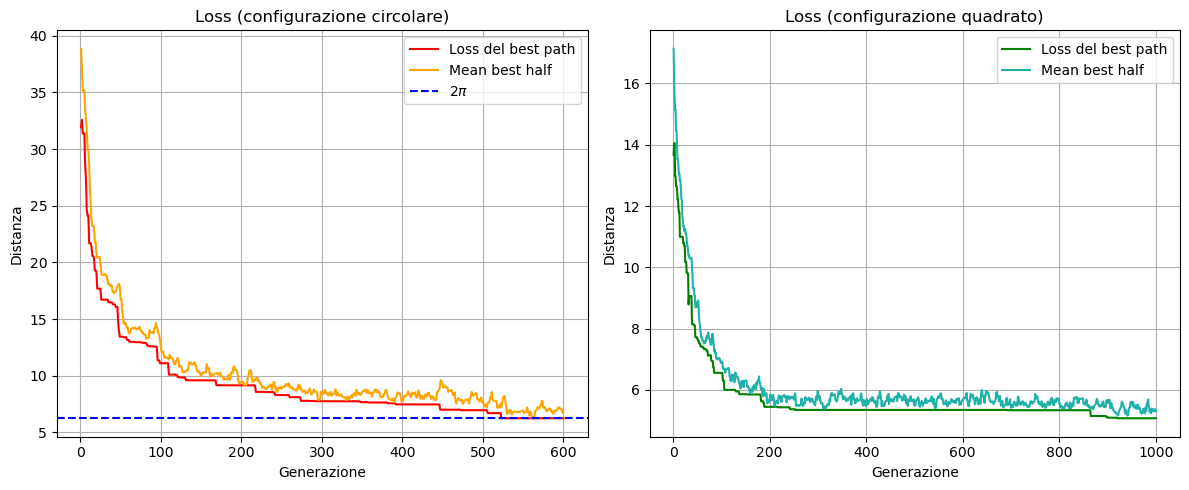

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
import warnings
warnings.filterwarnings('ignore')

loss_circ = pd.read_csv("OUTPUT/circonferenza/best_distances.out" ,delim_whitespace=True)
loss_sq = pd.read_csv("OUTPUT/quadrato/best_distances.out" ,delim_whitespace=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#circ loss
ax[0].plot(loss_circ['N'], loss_circ['L'], label='Loss del best path' , color = 'red')
ax[0].plot(loss_circ['N'], loss_circ['Half_pop_ave'], label='Mean best half', color = 'orange')
ax[0].axhline(y=2*np.pi, color='blue', linestyle='--', label=r'$2\pi$')
ax[0].set_title('Loss (configurazione circolare)')
ax[0].set_xlabel('Generazione')
ax[0].set_ylabel('Distanza')
ax[0].grid()
ax[0].legend()

# Quadrato
ax[1].plot(loss_sq['N'], loss_sq['L'], label='Loss del best path', color = 'green')
ax[1].plot(loss_sq['N'], loss_sq['Half_pop_ave'], label='Mean best half', color = 'lightseagreen')
ax[1].set_title('Loss (configurazione quadrato)')
ax[1].set_xlabel('Generazione')
ax[1].set_ylabel('Distanza')
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()


Possiamo notare dai plot che per la configurazione circolare, la loss assume un valore leggermente inferiore a $2\pi$, dovuto al fatto che il percorso ottimale è una spezzata inscritta nella circonferenza.
Per la configurazione nel quadrato notiamo che converge ad un valore ottimale poco dopo le 200 generazioni (dopo vedremo che è ottimale in quanto intuitivamente non sono presenti incroci nella traiettoria).

Il valor medio della loss per la migliore metà della popolazione non si discosta in maniera significativa dal migliore in assoluto.

Vado ora a mostrare i i cambiamenti nelle migliori configurazioni proposte ogni 200 Generazioni:

### PARAMETRI TRAIETTORIA LUNGO CIRCONFERENZA

- **numero di membri della popolazione** = 140
- **numero di generazioni** = 600
- **probablità di crossover** = 70% (il crossover include anche le mutazioni sui cromosomi al 10% ciascuna)
- **probabilità solo mutazione** $\sim 7\% $ ciascuna


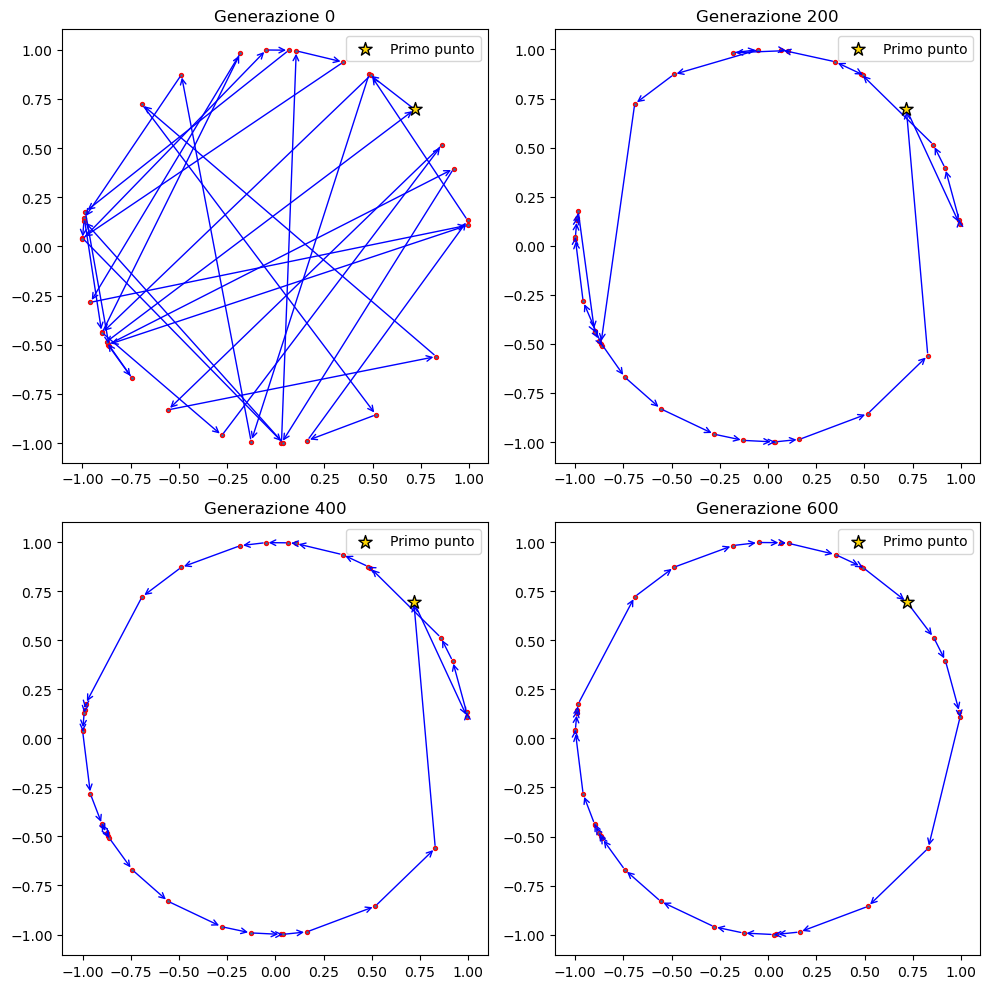

In [14]:


df600 = pd.read_csv("OUTPUT/circonferenza/path_600.out" ,delim_whitespace=True)
df400 = pd.read_csv("OUTPUT/circonferenza/path_400.out" ,delim_whitespace=True)
df200 = pd.read_csv("OUTPUT/circonferenza/path_200.out" ,delim_whitespace=True)
df0 = pd.read_csv("OUTPUT/circonferenza/path_0.out" ,delim_whitespace=True)

def draw_arrows(ax, x_vals, y_vals, color='blue'):
    n = len(x_vals)
    for i in range(n):
        start = (x_vals[i], y_vals[i])
        end = (x_vals[(i + 1) % n], y_vals[(i + 1) % n])
        arrow = FancyArrowPatch(start, end, arrowstyle='->', color=color, mutation_scale=10, linewidth=1)
        ax.add_patch(arrow)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

datasets = [(df0, "Generazione 0"),
            (df200, "Generazione 200"),
            (df400, "Generazione 400"),
            (df600, "Generazione 600")]

for ax, (df_current, title) in zip(axes.flat, datasets):
    x = df_current['X'].tail(34).values
    y = df_current['Y'].tail(34).values
    ax.scatter(x, y, s=8, edgecolor='r')
    draw_arrows(ax, x, y, color='blue')
    idx = df_current.index[df_current['city_id'] == 1][0]
    ax.scatter(df_current.loc[idx, 'X'], df_current.loc[idx, 'Y'],
               color='gold', edgecolor='black', s=100, marker='*', label='Primo punto')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

### PARAMETRI TRAIETTORIA INTERNA AD UN QUADRATO

- **numero di membri della popolazione** = 140
- **numero di generazioni** = 1000
- **probablità di crossover** = 70% (il crossover include anche le mutazioni sui cromosomi al 10% ciascuna)
- **probabilità solo mutazione** $\sim 7 \%$ ciascuna


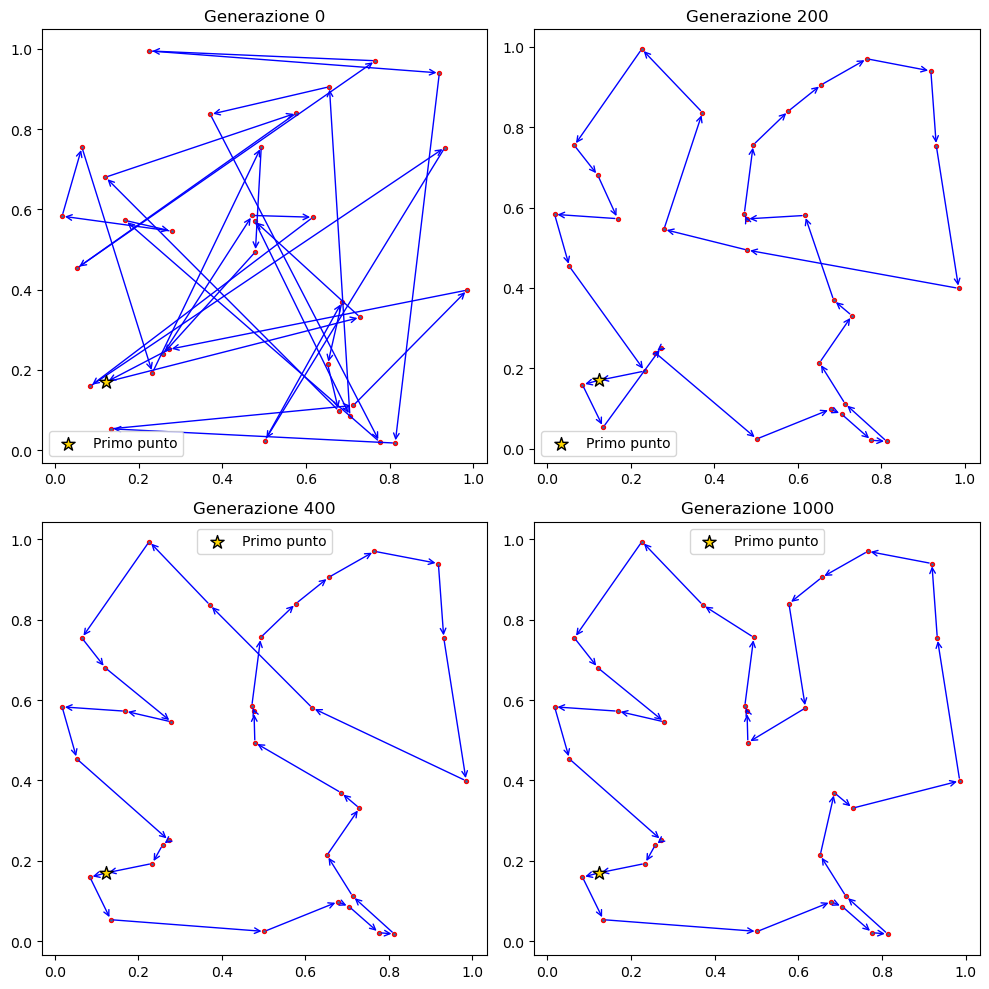

In [15]:
df1000_sq = pd.read_csv("OUTPUT/quadrato/path_1000.out" ,delim_whitespace=True)
df400_sq = pd.read_csv("OUTPUT/quadrato/path_400.out" ,delim_whitespace=True)
df200_sq = pd.read_csv("OUTPUT/quadrato/path_200.out" ,delim_whitespace=True)
df0_sq = pd.read_csv("OUTPUT/quadrato/path_0.out" ,delim_whitespace=True)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

datasets_sq = [(df0_sq, "Generazione 0"),
               (df200_sq, "Generazione 200"),
               (df400_sq, "Generazione 400"),
               (df1000_sq, "Generazione 1000")]

for ax, (df_current, title) in zip(axes.flat, datasets_sq):
    x = df_current['X'].tail(34).values
    y = df_current['Y'].tail(34).values
    ax.scatter(x, y, s=8, edgecolor='r')
    draw_arrows(ax, x, y, color='blue')
    idx = df_current.index[df_current['city_id'] == 1][0]
    ax.scatter(df_current.loc[idx, 'X'], df_current.loc[idx, 'Y'],
               color='gold', edgecolor='black', s=100, marker='*', label='Primo punto')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()



Notiamo che per entrambe le cofigurazioni, i percorsi per visitare tutti i punti diventano via via più brevi. Intuitivamente questo lo si può dedurre anche soltanto dalla diminuzione del numero di incroci nelle traiettorie.